<hr>

**Background info:**

https://www.tensorflow.org/datasets/catalog/fashion_mnist

https://github.com/zalandoresearch/fashion-mnist

Fashion-MNIST is a dataset of clothing images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [6]:
import numpy as np
import numpy.random as R
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist

# supress unnecessary warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

flabels = {0 : 't-shirt',
           1 : 'trousers',
           2 : 'pullover',
           3 : 'dress',
           4 : 'coat',
           5 : 'sandal',
           6 : 'shirt',
           7 : 'sneaker',
           8 : 'bag',
           9 : 'boot'}

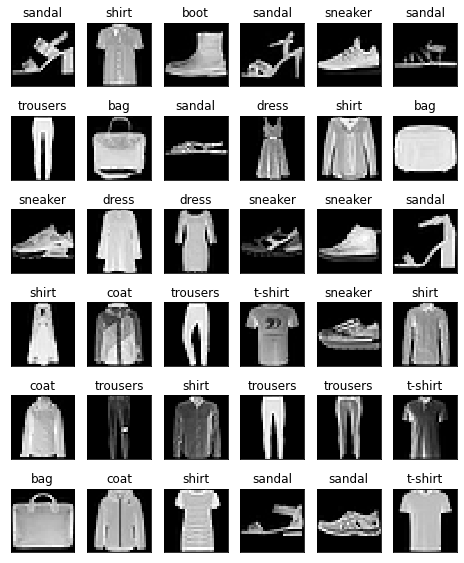

In [7]:
# display some images with their labels
fig = plt.figure(figsize=(8, 10))
N = 6
st_idx = R.randint(0, train_images.shape[0]-N*N-1)
for i in range(N*N):
    plt.subplot(N,N,i+1)
    plt.imshow(train_images[st_idx+i], cmap='gray', interpolation='none')
    plt.title(flabels[train_labels[st_idx+i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

Epoch 1/17
211/211 [==============================] - 1s 4ms/step - loss: 0.0419 - accuracy: 0.0076 - mse: 0.0419 - val_loss: 0.0219 - val_accuracy: 0.0183 - val_mse: 0.0219
Epoch 2/17
211/211 [==============================] - 1s 4ms/step - loss: 0.0184 - accuracy: 0.0161 - mse: 0.0184 - val_loss: 0.0156 - val_accuracy: 0.0223 - val_mse: 0.0156
Epoch 3/17
211/211 [==============================] - 1s 4ms/step - loss: 0.0141 - accuracy: 0.0257 - mse: 0.0141 - val_loss: 0.0127 - val_accuracy: 0.0333 - val_mse: 0.0127
Epoch 4/17
211/211 [==============================] - 1s 4ms/step - loss: 0.0119 - accuracy: 0.0313 - mse: 0.0119 - val_loss: 0.0112 - val_accuracy: 0.0410 - val_mse: 0.0112
Epoch 5/17
211/211 [==============================] - 1s 3ms/step - loss: 0.0107 - accuracy: 0.0366 - mse: 0.0107 - val_loss: 0.0102 - val_accuracy: 0.0383 - val_mse: 0.0102
Epoch 6/17
211/211 [==============================] - 1s 4ms/step - loss: 0.0099 - accuracy: 0.0397 - mse: 0.0099 - val_loss: 0.00

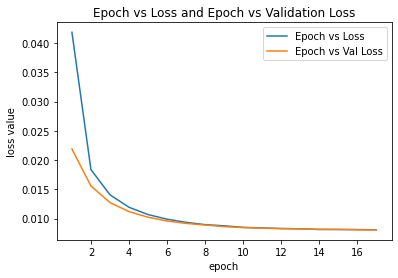

In [8]:
## creating network that produces a lower-dimensional representation of images

# image shape
sz = train_images.shape[1]
flen = sz*sz

# need to reshape and preprocess the training/testing images
train_images_vec = train_images.reshape((train_images.shape[0], train_images.shape[1] * train_images.shape[2]))
train_images_vec = train_images_vec.astype('float32') / 255
test_images_vec = test_images.reshape((test_images.shape[0], test_images.shape[1] * test_images.shape[2]))
test_images_vec = test_images_vec.astype('float32') / 255

# also need to categorically encode the labels
from tensorflow.keras.utils import to_categorical
train_labels_vec = to_categorical(train_labels)
test_labels_vec = to_categorical(test_labels)

# get half of train images and labels for training
train_images_vec_half = train_images_vec[:30000]
train_images_vec_second_half = train_images_vec[30000:]
train_labels_vec_half = train_labels_vec[:30000]
train_labels_vec_second_half = train_labels_vec[30000:]

# train network
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

network = models.Sequential()

nin  = flen
nhid1 = 100
nout = flen

network.add(layers.Dense(nhid1, 
                         activation='linear', 
                         input_shape=(nin,)))
network.add(layers.Dense(nout, 
                         activation='linear'))

# compile network
network.compile(optimizer='adam', 
                loss='mean_squared_error', 
                metrics=['accuracy', 'mse'])

# train network
history = network.fit(train_images_vec_half, 
                      train_images_vec_half, 
                      verbose=True, 
                      validation_split=.1, 
                      epochs=17, 
                      batch_size=128)

# plots
losses = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1, len(losses) + 1))

plt.plot(epochs, losses, label = 'Epoch vs Loss')
plt.plot(epochs, val_loss, label = 'Epoch vs Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.title('Epoch vs Loss and Epoch vs Validation Loss')
plt.legend()
plt.show()

# create a reduced dimensionality of remaining half
W = network.layers[0].get_weights()[0]
B = network.layers[0].get_weights()[1]

# linear activation function
n = np.dot(train_images_vec_second_half, W) + B
a = n

Epoch 1/25
211/211 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.5208 - mse: 0.0774 - val_loss: 0.0469 - val_accuracy: 0.6740 - val_mse: 0.0469
Epoch 2/25
211/211 [==============================] - 0s 2ms/step - loss: 0.0423 - accuracy: 0.6927 - mse: 0.0423 - val_loss: 0.0406 - val_accuracy: 0.6923 - val_mse: 0.0406
Epoch 3/25
211/211 [==============================] - 0s 1ms/step - loss: 0.0385 - accuracy: 0.7076 - mse: 0.0385 - val_loss: 0.0384 - val_accuracy: 0.7033 - val_mse: 0.0384
Epoch 4/25
211/211 [==============================] - 0s 1ms/step - loss: 0.0364 - accuracy: 0.7231 - mse: 0.0364 - val_loss: 0.0361 - val_accuracy: 0.7393 - val_mse: 0.0361
Epoch 5/25
211/211 [==============================] - 0s 1ms/step - loss: 0.0307 - accuracy: 0.7971 - mse: 0.0307 - val_loss: 0.0254 - val_accuracy: 0.8347 - val_mse: 0.0254
Epoch 6/25
211/211 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.8506 - mse: 0.0234 - val_loss: 0.02

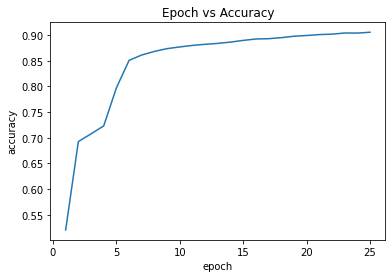

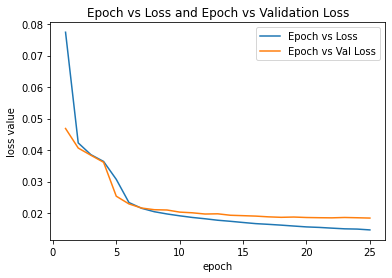

313/313 [==============================] - 0s 637us/step - loss: 0.0193 - accuracy: 0.8734 - mse: 0.0193
Accuracy is: 87.33999729156494%


In [9]:
## creating network that identifies clothing items

anetwork = models.Sequential()

anin = a.shape[1]
anhid1 = 100
anhid2 = 8
anout = 10

anetwork.add(layers.Dense(anhid1, 
                         activation='relu', 
                         input_shape=(anin,)))
anetwork.add(layers.Dense(anhid2, 
                         activation='relu'))
anetwork.add(layers.Dense(anout, 
                         activation='sigmoid'))

# compile network
anetwork.compile(optimizer='adam', 
                loss='mean_squared_error', 
                metrics=['accuracy', 'mse'])

# train network
ahistory = anetwork.fit(a, 
                      train_labels_vec_second_half, 
                      verbose=True, 
                      validation_split=.1, 
                      epochs=25, 
                      batch_size=128)

# plots
alosses = ahistory.history['loss']
aval_loss = ahistory.history['val_loss']
aepochs = list(range(1, len(alosses) + 1))
accuracies = ahistory.history['accuracy']

plt.plot(aepochs, accuracies)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Epoch vs Accuracy')
plt.show()

plt.plot(aepochs, alosses, label = 'Epoch vs Loss')
plt.plot(aepochs, aval_loss, label = 'Epoch vs Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.title('Epoch vs Loss and Epoch vs Validation Loss')
plt.legend()
plt.show()

# test network
n_test = np.dot(test_images_vec, W) + B
a_test = n_test
acc = anetwork.evaluate(a_test, test_labels_vec)
print('Accuracy is: {}%'.format(acc[1] * 100))

Epoch 1/15
422/422 [==============================] - 12s 29ms/step - loss: 2.1060 - accuracy: 0.5450 - val_loss: 0.9977 - val_accuracy: 0.6848
Epoch 2/15
422/422 [==============================] - 10s 24ms/step - loss: 0.8543 - accuracy: 0.7265 - val_loss: 0.7480 - val_accuracy: 0.7632
Epoch 3/15
422/422 [==============================] - 11s 26ms/step - loss: 0.6698 - accuracy: 0.7819 - val_loss: 0.6279 - val_accuracy: 0.8060
Epoch 4/15
422/422 [==============================] - 10s 24ms/step - loss: 0.5798 - accuracy: 0.8024 - val_loss: 0.5727 - val_accuracy: 0.8125
Epoch 5/15
422/422 [==============================] - 12s 29ms/step - loss: 0.5296 - accuracy: 0.8138 - val_loss: 0.5460 - val_accuracy: 0.8073
Epoch 6/15
422/422 [==============================] - 9s 21ms/step - loss: 0.4914 - accuracy: 0.8239 - val_loss: 0.5275 - val_accuracy: 0.8202
Epoch 7/15
422/422 [==============================] - 12s 29ms/step - loss: 0.4601 - accuracy: 0.8327 - val_loss: 0.4741 - val_accuracy: 

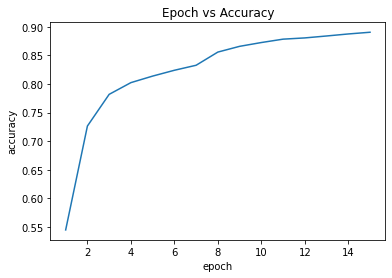

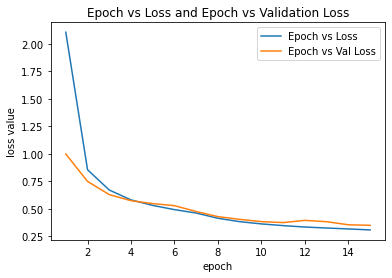

313/313 [==============================] - 1s 4ms/step - loss: 0.3688 - accuracy: 0.8708
Accuracy is: 87.08000183105469%


In [10]:
## creating convolutional network that classifies images

# reshape
train_images_con = train_images.reshape((train_images.shape[0], sz, sz, 1))
test_images_con = test_images.reshape((test_images.shape[0], sz, sz, 1))

cnetwork = models.Sequential()
cnout = 10

cnetwork.add(layers.Conv2D(16, (3,3), 
                         activation='relu', 
                         input_shape=(sz,sz,1)))
cnetwork.add(layers.MaxPooling2D((2,2)))
cnetwork.add(layers.Conv2D(16, (3,3),
                         activation='relu'))
cnetwork.add(layers.MaxPooling2D((2,2)))
cnetwork.add(layers.Flatten())
cnetwork.add(layers.Dense(20,
                         activation='relu'))
cnetwork.add(layers.Dense(cnout, 
                         activation='softmax'))

# compile network
cnetwork.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

# train network
chistory = cnetwork.fit(train_images_con, 
                      train_labels_vec, 
                      verbose=True, 
                      validation_split=.1, 
                      epochs=15, 
                      batch_size=128)

# plots
closses = chistory.history['loss']
cval_loss = chistory.history['val_loss']
cepochs = list(range(1, len(closses) + 1))
caccuracies = chistory.history['accuracy']

plt.plot(cepochs, caccuracies)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Epoch vs Accuracy')
plt.show()

plt.plot(cepochs, closses, label = 'Epoch vs Loss')
plt.plot(cepochs, cval_loss, label = 'Epoch vs Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.title('Epoch vs Loss and Epoch vs Validation Loss')
plt.legend()
plt.show()

# test network
acc = cnetwork.evaluate(test_images_con, test_labels_vec)
print('Accuracy is: {}%'.format(acc[1] * 100))